<img src="https://www.bbva.com/wp-content/uploads/2019/11/machine-learning-1024x629.jpg">

<h1>Machine Learning<span class="tocSkip"></span></h1>



# Import

## Libraries

In [1]:
import src.limpieza as lm
import pandas as pd
import numpy as np
import pickle
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

## Machine learning libraries

In [2]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
import h2o
from h2o.automl import H2OAutoML

## Dataframe

In [25]:
data = pd.read_csv("data/cars_limpio.csv")
data.dtypes

Unnamed: 0         int64
distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
gas_type          object
AC                 int64
rain               int64
sun                int64
Fuel_Price       float64
Journey_Price    float64
dtype: object

In [26]:
data = data.drop("Unnamed: 0",axis=1)

# Categorical to numerical

In [27]:
data = pd.get_dummies(data, prefix=["gas_type"])

In [28]:
data.head(3)

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,Fuel_Price,Journey_Price,gas_type_E10,gas_type_SP98
0,28.0,5.0,26,21.5,12,0,0,0,1.38,1.93,1,0
1,12.0,4.2,30,21.5,13,0,0,0,1.38,0.70,1,0
2,11.2,5.5,38,21.5,15,0,0,0,1.38,0.85,1,0


# Correlated columns

<AxesSubplot:>

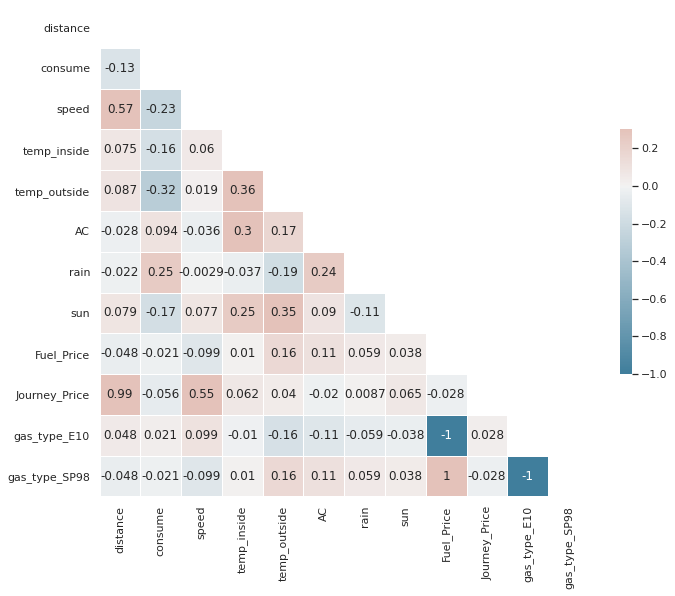

In [29]:
lm.heat_map_triangle(data)

As we can see, the categorical columns are correlated with the price, logically the `Fuel_price` column is the price that each type of fuel has, so the relationship between these columns is `1`.

The next step is to delete the fuel price column.

In [30]:
data.drop("Fuel_Price",axis=1, inplace=True)

Since we only have two types of gasoline, if it is not one type it is the other, so we can do without one of the gasoline type columns.

In [31]:
data.drop("gas_type_SP98",axis=1, inplace=True)

The `journey_price` column has been created by us as a consequence of multiplying the distance, consumption and speed, so we can also eliminate it.

In [32]:
data.drop("Journey_Price",axis=1, inplace=True)

In [33]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,gas_type_E10
0,28.0,5.0,26,21.5,12,0,0,0,1
1,12.0,4.2,30,21.5,13,0,0,0,1
2,11.2,5.5,38,21.5,15,0,0,0,1
3,12.9,3.9,36,21.5,14,0,0,0,1
4,18.5,4.5,46,21.5,15,0,0,0,1


<AxesSubplot:>

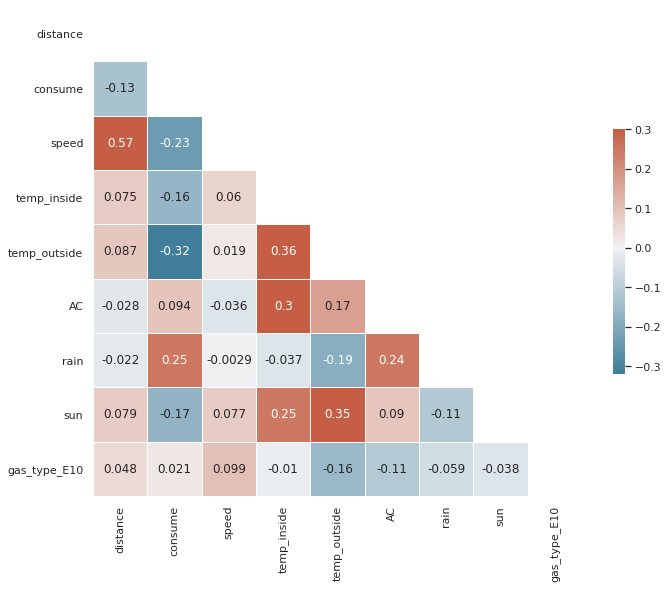

In [34]:
lm.heat_map_triangle(data)

# Train-Test-Split

In [35]:
modelo = data

In [36]:
X = modelo.drop("consume", axis=1)
y = modelo.consume

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [38]:
X_train.shape

(300, 8)

In [39]:
X_test.shape

(76, 8)

In [40]:
y_train.shape

(300,)

In [41]:
y_test.shape

(76,)

# Train models

## OLS

In [44]:
variables = smf.ols("consume ~ distance + speed + temp_inside + temp_outside + AC + rain + sun + gas_type_E10", data = data).fit()
variables.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                consume   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     11.92
Date:                Sun, 30 May 2021   Prob (F-statistic):           3.84e-15
Time:                        16:58:58   Log-Likelihood:                -504.58
No. Observations:                 376   AIC:                             1027.
Df Residuals:                     367   BIC:                             1063.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        7.7082      1.159      6.652      0.000       5.430       9.987
distance         0.0020      0.003      0.780      0.436      -0.003       0.007
speed           -0.0186      0.004     -4.312      0.000      -0.027      -0.010
temp_inside     -0.0780      0.054     -1.448      0.149      -0.184       0.028
temp_outside    -0.0390      0.008     -4.901      0.000      -0.055      -0.023
AC               0.4560      0.197      2.320      0.021       0.070       0.842
rain             0.5164      0.156      3.310      0.001       0.210       0.823
sun             -0.1273      0.190     -0.669      0.504      -0.501       0.247
gas_type_E10     0.0470      0.101      0.467      0.640      -0.151       0.245
==============================================================================
Omnibus:                      248.875   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2935.909
Skew:                           2.656   Prob(JB):                         0.00
Kurtosis:                      15.617   Cond. No.                     1.34e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Models

In [45]:
models = {"ridge":Ridge(),
         "lasso":Lasso(),
         "sgd":SGDRegressor(),
         "KNN":KNeighborsRegressor(),
         "gradient":GradientBoostingRegressor(),
          "Rfr" : RandomForestRegressor(),
          "Decision Tree" : DecisionTreeRegressor(max_depth=7),
          "XGBoost" : XGBRegressor(),
          "Linear Regressor" : LinearRegression()
          
         }

In [46]:

dicc= {}

for name, model in models.items():
    dicc_metrics = {}
    
    print(f"Trainning model -----> {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    dicc_metrics["MAE"] = metrics.mean_absolute_error(y_test, y_pred)
    dicc_metrics["MSE"] = metrics.mean_squared_error(y_test,y_pred)
    dicc_metrics["RMSE"] = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    dicc_metrics["R2_score"] = round((metrics.r2_score(y_true=y_test,y_pred=y_pred)*100),2)
    
    dicc[name] = dicc_metrics
    
    print("Model finished")
metricas = pd.DataFrame(dicc)
metricas

Trainning model -----> ridge
Model finished
Trainning model -----> lasso
Model finished
Trainning model -----> sgd
Model finished
Trainning model -----> KNN
Model finished
Trainning model -----> gradient
Model finished
Trainning model -----> Rfr
Model finished
Trainning model -----> Decision Tree
Model finished
Trainning model -----> XGBoost


/home/marcunu/.local/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Model finished
Trainning model -----> Linear Regressor
Model finished


,ridge,lasso,sgd,KNN,gradient,Rfr,Decision Tree,XGBoost,Linear Regressor
MAE,0.716456,0.716365,3.026410e+12,0.562632,0.526534,0.563010,0.653205,0.561576,0.717217
MSE,1.535736,1.698452,9.702140e+24,0.907895,0.646758,0.731680,0.833217,0.758518,1.533500
RMSE,1.239248,1.303247,3.114826e+12,0.952835,0.804213,0.855383,0.912807,0.870930,1.238346
R2_score,15.050000,6.050000,-5.366566e+26,49.780000,64.230000,59.530000,53.910000,58.040000,15.180000


# Max depth

In [51]:
results = []

for depth in range(1, 25):
    model = RandomForestRegressor(max_depth=depth)
    model.fit(X_train, y_train)
    
    result = {
        "depth": depth,
        "train_error": metrics.mean_squared_error(y_train, model.predict(X_train)),
        "test_error": metrics.mean_squared_error(y_test, model.predict(X_test))
    }
    
    results.append(result)

In [52]:
results_df = pd.DataFrame(results)

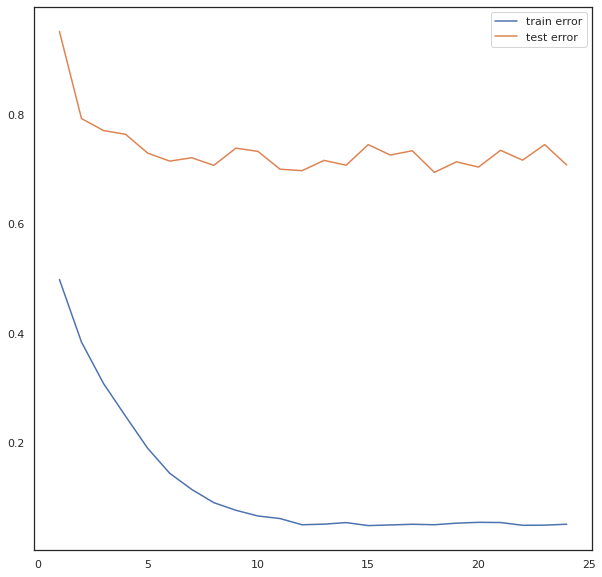

In [53]:
fig = plt.figure(figsize=(10, 10))
plt.plot(results_df.depth, results_df.train_error, label="train error")
plt.plot(results_df.depth, results_df.test_error, label="test error")
plt.legend()

# Parameter Tuning
Now that we have found the most efficient model, let's try the different `hyperparameters` to improve it.



In [67]:
gs = GridSearchCV(
    estimator=GradientBoostingRegressor(),
    param_grid={
        "max_depth": [2,3,4,5,6],
        "max_features": [0.3,0.4,0.5,0.55],
        "min_samples_split": [2,3,4]
    },
    cv=5,
    verbose=3,
    scoring="neg_mean_squared_error",
    return_train_score=True
)

In [68]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END max_depth=2, max_features=0.3, min_samples_split=2; total time=   0.1s
[CV 2/5] END max_depth=2, max_features=0.3, min_samples_split=2; total time=   0.1s
[CV 3/5] END max_depth=2, max_features=0.3, min_samples_split=2; total time=   0.1s
[CV 4/5] END max_depth=2, max_features=0.3, min_samples_split=2; total time=   0.1s
[CV 5/5] END max_depth=2, max_features=0.3, min_samples_split=2; total time=   0.1s
[CV 1/5] END max_depth=2, max_features=0.3, min_samples_split=3; total time=   0.1s
[CV 2/5] END max_depth=2, max_features=0.3, min_samples_split=3; total time=   0.1s
[CV 3/5] END max_depth=2, max_features=0.3, min_samples_split=3; total time=   0.1s
[CV 4/5] END max_depth=2, max_features=0.3, min_samples_split=3; total time=   0.1s
[CV 5/5] END max_depth=2, max_features=0.3, min_samples_split=3; total time=   0.1s
[CV 1/5] END max_depth=2, max_features=0.3, min_samples_split=4; total time=   0.1s
[CV 2/5] END m

[CV 2/5] END max_depth=3, max_features=0.5, min_samples_split=3; total time=   0.1s
[CV 3/5] END max_depth=3, max_features=0.5, min_samples_split=3; total time=   0.1s
[CV 4/5] END max_depth=3, max_features=0.5, min_samples_split=3; total time=   0.1s
[CV 5/5] END max_depth=3, max_features=0.5, min_samples_split=3; total time=   0.1s
[CV 1/5] END max_depth=3, max_features=0.5, min_samples_split=4; total time=   0.1s
[CV 2/5] END max_depth=3, max_features=0.5, min_samples_split=4; total time=   0.1s
[CV 3/5] END max_depth=3, max_features=0.5, min_samples_split=4; total time=   0.1s
[CV 4/5] END max_depth=3, max_features=0.5, min_samples_split=4; total time=   0.1s
[CV 5/5] END max_depth=3, max_features=0.5, min_samples_split=4; total time=   0.1s
[CV 1/5] END max_depth=3, max_features=0.55, min_samples_split=2; total time=   0.1s
[CV 2/5] END max_depth=3, max_features=0.55, min_samples_split=2; total time=   0.1s
[CV 3/5] END max_depth=3, max_features=0.55, min_samples_split=2; total ti

[CV 4/5] END max_depth=5, max_features=0.3, min_samples_split=4; total time=   0.1s
[CV 5/5] END max_depth=5, max_features=0.3, min_samples_split=4; total time=   0.1s
[CV 1/5] END max_depth=5, max_features=0.4, min_samples_split=2; total time=   0.1s
[CV 2/5] END max_depth=5, max_features=0.4, min_samples_split=2; total time=   0.1s
[CV 3/5] END max_depth=5, max_features=0.4, min_samples_split=2; total time=   0.1s
[CV 4/5] END max_depth=5, max_features=0.4, min_samples_split=2; total time=   0.1s
[CV 5/5] END max_depth=5, max_features=0.4, min_samples_split=2; total time=   0.1s
[CV 1/5] END max_depth=5, max_features=0.4, min_samples_split=3; total time=   0.1s
[CV 2/5] END max_depth=5, max_features=0.4, min_samples_split=3; total time=   0.1s
[CV 3/5] END max_depth=5, max_features=0.4, min_samples_split=3; total time=   0.1s
[CV 4/5] END max_depth=5, max_features=0.4, min_samples_split=3; total time=   0.1s
[CV 5/5] END max_depth=5, max_features=0.4, min_samples_split=3; total time=

[CV 1/5] END max_depth=6, max_features=0.55, min_samples_split=3; total time=   0.1s
[CV 2/5] END max_depth=6, max_features=0.55, min_samples_split=3; total time=   0.1s
[CV 3/5] END max_depth=6, max_features=0.55, min_samples_split=3; total time=   0.1s
[CV 4/5] END max_depth=6, max_features=0.55, min_samples_split=3; total time=   0.1s
[CV 5/5] END max_depth=6, max_features=0.55, min_samples_split=3; total time=   0.1s
[CV 1/5] END max_depth=6, max_features=0.55, min_samples_split=4; total time=   0.1s
[CV 2/5] END max_depth=6, max_features=0.55, min_samples_split=4; total time=   0.1s
[CV 3/5] END max_depth=6, max_features=0.55, min_samples_split=4; total time=   0.1s
[CV 4/5] END max_depth=6, max_features=0.55, min_samples_split=4; total time=   0.1s
[CV 5/5] END max_depth=6, max_features=0.55, min_samples_split=4; total time=   0.1s


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'max_features': [0.3, 0.4, 0.5, 0.55],
                         'min_samples_split': [2, 3, 4]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=3)

In [69]:
grid_search_results = pd.DataFrame(gs.cv_results_)
# we only keep some of the information
grid_search_results = grid_search_results[['param_max_depth', 'param_max_features', 'param_min_samples_split',
       'mean_test_score', 'mean_train_score']]
grid_search_results["diferencia"] = grid_search_results["mean_test_score"] - grid_search_results["mean_train_score"]

In [70]:
grid_search_results.sort_values("mean_test_score", ascending=False).head(15)

,param_max_depth,param_max_features,param_min_samples_split,mean_test_score,mean_train_score,diferencia
15,3,0.4,2,-0.339411,-0.090540,-0.248870
5,2,0.4,4,-0.344669,-0.161381,-0.183288
11,2,0.55,4,-0.347016,-0.157800,-0.189216
13,3,0.3,3,-0.349096,-0.106268,-0.242829
4,2,0.4,3,-0.349200,-0.160874,-0.188326
16,3,0.4,3,-0.349941,-0.091008,-0.258933
31,4,0.5,3,-0.350221,-0.038539,-0.311683
10,2,0.55,3,-0.350319,-0.157888,-0.192431
19,3,0.5,3,-0.354383,-0.081526,-0.272857
35,4,0.55,4,-0.354447,-0.040399,-0.314048


In [76]:
best_tree = gs.best_estimator_
best_tree

GradientBoostingRegressor(max_features=0.4)

In [75]:
metrics.r2_score(y_true=y_test,y_pred=y_pred)

0.15177197884363247

In [81]:
asd=34
asfd=12

dc={"SP98":asd,"E10":asfd}

mejor = min(dc, key=dc.get)

print(f"he best fuel for this travel is {mejor}")

he best fuel for this travel is E10


# Best Hyperparameters
Now we have to save the hyperparameters, in order to use the best model in our app.

In [77]:
pickle.dump(best_tree,open("Tools/parameters/cars", "wb"))

# H2O Trainning

## Init H2O

In [32]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.11" 2021-04-20; OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.20.04); OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.20.04, mixed mode, sharing)
  Starting server from /home/marcunu/.local/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp22hl6jy1
  JVM stdout: /tmp/tmp22hl6jy1/h2o_marcunu_started_from_python.out
  JVM stderr: /tmp/tmp22hl6jy1/h2o_marcunu_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,Europe/Madrid
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.2
H2O_cluster_version_age:,1 month
H2O_cluster_name:,H2O_from_python_marcunu_t4e63b
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.973 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"accepting new members, healthy"


In [33]:
train = X_train
train["consume"] = y_train

<ipython-input-33-e67f4df077e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["consume"] = y_train


In [34]:
h2train = h2o.H2OFrame(train)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [35]:
x = list(train.columns)
x.remove('consume')

y = "consume"

print("X:", x)
print("y:", y)

X: ['distance', 'speed', 'temp_inside', 'temp_outside', 'AC', 'rain', 'sun', 'gas_type_E10']
y: consume


## Settings

In [78]:
automl = H2OAutoML(max_models=50, max_runtime_secs=6000, sort_metric='RMSE')
automl.train(x=x, y=y, training_frame=h2train)

H2OConnectionError: Not connected to a cluster. Did you run `h2o.connect()`?

## Find the best model

In [ ]:
leader_board = automl.leaderboard
leader_board.head()

## Test the best model

In [ ]:
#Loading the TEST dataset

stacked_test = pd.read_csv("data/Machine_learning/Test/casas_test.csv") #Cleaned Test dataset from Kaggle
h2test_stacked = h2o.H2OFrame(stacked_test) #Conversion into a H20 frame to train

h2test_stacked.head() #preview

In [ ]:
predicted_price_h2_stacked = automl.leader.predict(h2test_stacked.drop("buy_price")).as_data_frame() #PREDICTING the PRICES on the TEST dataset
predicted_price_h2_stacked #Result